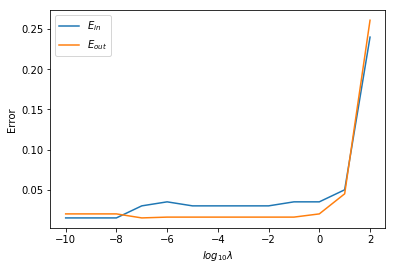

Q7: g_lambda_in = -8 ,Ein = 0.015 ,e_out = 0.02
Q7: g_lambda_out = -7 ,e_in = 0.03 ,Eout = 0.015


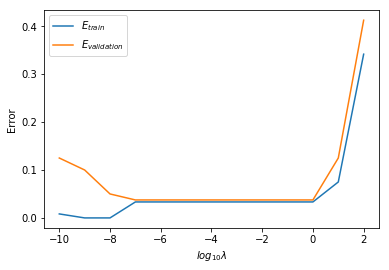

Q8: g_lambda_train = -8 ,Etrain = 0.0 ,e_val = 0.05 ,e_out = 0.025
Q8: g_lambda_val = 0 ,e_train = 0.0333333333333 ,Eval = 0.0375 ,e_out = 0.028


In [40]:
## Date: 2018-01-03
## Purpose: Machine Learning Fundation hw4_7&8
## Author: Po-Chu Chen

import numpy as np
import matplotlib.pyplot as plt

def ridge_regression(X, y, lamda):
    n, d = X.shape
    return np.linalg.inv((X.T.dot(X)+lamda*np.eye(d))).dot(X.T).dot(y)

def error(X, y, w):
    y_predict = np.sign(X.dot(w))
    return np.sum(y!=y_predict) / y.size

def load_xy(fname):
    data = np.loadtxt(fname)
    m, _ = data.shape
    x = np.hstack((np.ones((m, 1)), data[:,:-1])) 
    y = data[:,-1:]
    return x, y

X, y = load_xy('hw4_train.dat.txt')
X_test, y_test = load_xy('hw4_test.dat.txt')

## Q7 
indexs = range(2, -11, -1)
all_lamda = [10**i for i in indexs]
all_w = [ridge_regression(X, y, lamda) for lamda in all_lamda]
all_e_in = [error(X, y, w) for w in all_w]
all_e_out = [error(X_test, y_test, w) for w in all_w]
plt.figure()
plt.plot(indexs, all_e_in, label='$E_{in}$')
plt.plot(indexs, all_e_out, label='$E_{out}$')
plt.xlabel("$log_{10} \lambda$")
plt.ylabel("Error")
plt.legend()
plt.show()
index_in = np.argmin(all_e_in)
index_out = np.argmin(all_e_out)
print('Q7:','g_lambda_in =',indexs[index_in], ',Ein =',all_e_in[index_in], ',e_out =',all_e_out[index_in])
print('Q7:','g_lambda_out =',indexs[index_out], ',e_in =', all_e_in[index_out], ',Eout =',all_e_out[index_out])



## Q8 
X_train, y_train = X[:120], y[:120]
X_val, y_val = X[120:], y[120:]

all_w = [ridge_regression(X_train, y_train, lamda) for lamda in all_lamda]
all_e_train = [error(X_train, y_train, w) for w in all_w]
all_e_out = [error(X_test, y_test, w) for w in all_w]
all_e_val = [error(X_val, y_val, w) for w in all_w]
plt.figure()
plt.plot(indexs, all_e_train, label='$E_{train}$')
plt.plot(indexs, all_e_val, label='$E_{validation}$')
plt.xlabel("$log_{10} \lambda$")
plt.ylabel("Error")
plt.legend()
plt.show()
index_train = np.argmin(all_e_train)
index_val = np.argmin(all_e_val)
print('Q8:','g_lambda_train =', indexs[index_train], ',Etrain =', all_e_train[index_train], ',e_val =',all_e_val[index_train], ',e_out =',all_e_out[index_train])
print('Q8:','g_lambda_val =',indexs[index_val], ',e_train =',all_e_train[index_val], ',Eval =',all_e_val[index_val], ',e_out =',all_e_out[index_val])
